<a href="https://colab.research.google.com/github/listakurniawati/Mathematical-Modelling-for-Chronic-Kidney-Disease-Detection-using-Multi-layer-Perceptron/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
import random
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

# **Pemisahan Data**

In [ ]:
#persiapan data
dt = pd.read_csv('https://raw.githubusercontent.com/Syamsyuriani/CKD/main/DatasetPGK(Processed).csv')
 
X = dt.drop(columns=['age', 'su', 'pc', 'pcc', 'ba', 'sod', 'pot', 'appet', 'pe', 'classification'])
X

,bp,sg,al,bgr,bu,sc,hemo,pcv,wc,rc,htn,dm,cad,ane
0,80,1.020,1,121,36.0,1.2,15.4,44.0,7800,5.200000,1,1,0,0
1,50,1.020,4,122,18.0,0.8,11.3,38.0,6000,4.232106,0,0,0,0
2,80,1.010,2,423,53.0,1.8,9.6,31.0,7500,3.773686,0,1,0,1
3,70,1.005,4,117,56.0,3.8,11.2,32.0,6700,3.900000,1,0,0,1
4,80,1.010,2,106,26.0,1.4,11.6,35.0,7300,4.600000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,80,1.020,0,140,49.0,0.5,15.7,47.0,6700,4.900000,0,0,0,0
347,70,1.025,0,75,31.0,1.2,16.5,54.0,7800,6.200000,0,0,0,0
348,80,1.020,0,100,26.0,0.6,15.8,49.0,6600,5.400000,0,0,0,0
349,60,1.025,0,114,50.0,1.0,14.2,51.0,7200,5.900000,0,0,0,0


In [ ]:
#pisah data numerik
var_kategorik = ['al', 'htn', 'dm', 'cad', 'ane']
X_numerik = X.drop(columns=var_kategorik)
X_kategorik = X[var_kategorik]

In [ ]:
#Standarisasi yang numerik
scaler = StandardScaler()
scaler.fit(X_numerik)
X_numerik = scaler.transform(X_numerik)

In [ ]:
#gabung X_numerik & X_kategorik
X_numerik = pd.DataFrame(X_numerik)
X = pd.concat([X_numerik, X_kategorik], axis=1)
X.rename(
    columns=({ 0: 'bp', 1: 'sg', 2: 'bgr', 3: 'bu', 4: 'sc', 5: 'hemo', 6: 'pcv', 7: 'wc', 8: 'rc'}), 
    inplace=True,
)

In [ ]:
X

,bp,sg,bgr,bu,sc,hemo,pcv,wc,rc,al,htn,dm,cad,ane
0,0.301532,0.448300,-0.341271,-0.378493,-0.385674,1.000587,0.606227,0.266754,0.629524,1,1,1,0,0
1,-1.966422,0.448300,-0.328218,-0.752422,-0.498390,-0.551412,-0.126860,-0.145825,-0.450583,4,0,0,0,0
2,0.301532,-1.307875,3.600691,-0.025337,-0.216601,-1.194924,-0.982128,0.197991,-0.962149,2,0,1,0,1
3,-0.454452,-2.185962,-0.393482,0.036985,0.346979,-0.589266,-0.859947,0.014622,-0.821191,4,1,0,0,1
4,0.301532,-1.307875,-0.537064,-0.586231,-0.329317,-0.437851,-0.493404,0.152149,-0.040037,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.301532,0.448300,-0.093267,-0.108432,-0.582927,1.114148,0.972770,0.014622,0.294744,0,0,0,0,0
347,-0.454452,1.326387,-0.941702,-0.482362,-0.385674,1.416977,1.828038,0.266754,1.745459,0,0,0,0,0
348,0.301532,0.448300,-0.615381,-0.586231,-0.554748,1.152002,1.217132,-0.008299,0.852711,0,0,0,0,0
349,-1.210437,1.326387,-0.432641,-0.087659,-0.442032,0.546343,1.461495,0.129228,1.410678,0,0,0,0,0


In [ ]:
y= dt.iloc[:,-1]

def_encoder = LabelEncoder()
y = def_encoder.fit_transform(y)

In [ ]:
#pisah data train & data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) #kenapa 42?

# **Melatih Data**

In [ ]:
random.seed(69)

def create_model(learn_rate, hidden_layers, neurons):
  model = Sequential()
  model.add(Dense(14))
  for i in range(hidden_layers):
    model.add(Dense(neurons, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = SGD(learning_rate=learn_rate)
  model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model
 
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

param_grid = {"hidden_layers": [1,2,3,4,5], "neurons": [1,2,3,5,6,7,8,9,10,11,12,13,14], "learn_rate": [0.0001, 0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X_train, y_train)
 
print("Akurasi terbaik: %f menggunakan %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Akurasi: %f (%f) dengan: %r" % (mean, stdev, param))

Akurasi terbaik: 0.996429 menggunakan {'hidden_layers': 1, 'learn_rate': 1, 'neurons': 2}
Akurasi: 0.557143 (0.179427) dengan: {'hidden_layers': 1, 'learn_rate': 0.0001, 'neurons': 1}
Akurasi: 0.521429 (0.232664) dengan: {'hidden_layers': 1, 'learn_rate': 0.0001, 'neurons': 2}
Akurasi: 0.489286 (0.193682) dengan: {'hidden_layers': 1, 'learn_rate': 0.0001, 'neurons': 3}
Akurasi: 0.489286 (0.192360) dengan: {'hidden_layers': 1, 'learn_rate': 0.0001, 'neurons': 5}
Akurasi: 0.521429 (0.224858) dengan: {'hidden_layers': 1, 'learn_rate': 0.0001, 'neurons': 6}
Akurasi: 0.589286 (0.143969) dengan: {'hidden_layers': 1, 'learn_rate': 0.0001, 'neurons': 7}
Akurasi: 0.485714 (0.172171) dengan: {'hidden_layers': 1, 'learn_rate': 0.0001, 'neurons': 8}
Akurasi: 0.542857 (0.191530) dengan: {'hidden_layers': 1, 'learn_rate': 0.0001, 'neurons': 9}
Akurasi: 0.446429 (0.237036) dengan: {'hidden_layers': 1, 'learn_rate': 0.0001, 'neurons': 10}
Akurasi: 0.571429 (0.183503) dengan: {'hidden_layers': 1, 'lear

# **Model dengan Parameter Terbaik**

In [ ]:
print(grid_result.best_params_)

{'hidden_layers': 1, 'learn_rate': 1, 'neurons': 2}


In [ ]:
y_pred= grid_result.predict(X_test)
print('Akurasi:',metrics.accuracy_score(y_pred,y_test))
print('Presisi:',metrics.precision_score(y_pred,y_test))
print('Recall:',metrics.recall_score(y_pred,y_test))

Akurasi: 0.971830985915493
Presisi: 0.9782608695652174
Recall: 0.9782608695652174


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
X_test

,bp,sg,bgr,bu,sc,hemo,pcv,wc,rc,al,htn,dm,cad,ane
157,-0.454452,-1.307875,-0.328218,-0.669327,-0.526569,-0.778534,-0.615585,1.298203,-0.631136,2,0,0,0,0
342,0.301532,1.326387,-0.811173,-0.793970,-0.413853,1.076294,0.606227,-0.191667,1.857052,0,0,0,0,0
316,0.301532,0.448300,-0.706751,-0.170754,-0.442032,-0.097168,-0.080654,0.931466,1.857052,0,0,0,0,0
234,-0.454452,1.326387,-0.093267,-0.648553,-0.554748,1.341270,1.094951,-0.191667,1.075898,0,0,0,0,0
155,-0.454452,0.448300,-0.628434,-0.648553,-0.554748,-0.286437,-0.615585,-1.519256,-0.239937,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1.057517,-1.307875,1.185913,0.057758,-0.019348,-1.119217,-1.348672,0.312597,-1.490752,0,1,1,0,0
179,1.813502,-1.307875,-0.902543,0.140854,-0.216601,-0.210729,-0.371223,0.885624,-0.374817,1,0,1,0,0
199,-0.454452,-1.307875,0.872645,0.867939,1.051453,-1.270631,-1.348672,1.114834,-1.490752,4,1,1,1,1
327,-0.454452,1.326387,-0.772015,-0.793970,-0.413853,1.379123,1.705857,0.564728,0.629524,0,0,0,0,0


In [ ]:
#coba pake data-data
dt2 = pd.read_csv('https://raw.githubusercontent.com/Syamsyuriani/CKD/main/DatasetPGK(Processed).csv')
X2 = dt2.drop(columns=['age', 'su', 'pc', 'pcc', 'ba', 'sod', 'pot', 'appet', 'pe', 'classification'])
cols = list(X_test.columns.values)
X2 = X2[cols]
y2 = dt2.iloc[:,-1]

In [ ]:
y2_pred= grid.predict(X2)
print('Akurasi:',metrics.accuracy_score(y2_pred,y2))

Akurasi: 0.5868945868945868


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


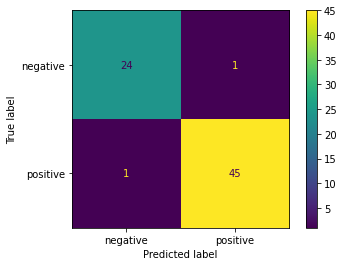

In [ ]:
cm_mlp = confusion_matrix(y_test, y_pred)
cm_mlp
 
cm_display = ConfusionMatrixDisplay(cm_mlp, display_labels= ['negative','positive']).plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(24, 1, 1, 45)

# **Rata-rata**

In [ ]:
akurasi = [None]*10
presisi = [None]*10
recall = [None]*10

for i in range(10):
  dt = pd.read_csv('https://raw.githubusercontent.com/Syamsyuriani/CKD/main/DatasetPGK(Processed).csv')
  X = dt.drop(columns=['age', 'su', 'pc', 'pcc', 'ba', 'sod', 'pot', 'appet', 'pe', 'classification'])
  
  #Pisah data numerik
  var_kategorik = ['al', 'htn', 'dm', 'cad', 'ane']
  X_numerik = X.drop(columns=var_kategorik)
  X_kategorik = X[var_kategorik]

  #Standarisasi yang numerik
  scaler = StandardScaler()
  scaler.fit(X_numerik)
  X_numerik = scaler.transform(X_numerik)

  #gabung X_numerik & X_kategorik
  X_numerik = pd.DataFrame(X_numerik)
  X = pd.concat([X_numerik, X_kategorik], axis=1)
  X.rename(
    columns=({ 0: 'bp', 1: 'sg', 2: 'bgr', 3: 'bu', 4: 'sc', 5: 'hemo', 6: 'pcv', 7: 'wc', 8: 'rc'}), 
    inplace=True,
  )

  y= dt.iloc[:,-1]
  def_encoder = LabelEncoder()
  y = def_encoder.fit_transform(y)  

  #pisah data train & data test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  model = Sequential()
  model.add(Dense(14))
  for j in range(1): #################### jumlah hidden layer ####################
    model.add(Dense(2, activation='relu')) ###################### jumlah neuron ########################
  model.add(Dense(1, activation='sigmoid'))
  optimizer = SGD(learning_rate=1) ################## learning rate #######################
  model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  model.fit(X_train, y_train, batch_size=32, epochs = 10, validation_data = (X_train, y_train))

  y_pred = model.predict_classes(X_test)

  TP = 0
  FP = 0
  TN = 0
  FN = 0
  for k in range(len(y_pred)):
    if y_pred[k] == 1 and y_test[k] == 1:
      TP += 1
    if y_pred[k] == 1 and y_test[k] == 0:
      FP += 1
    if y_pred[k] == 0 and y_test[k] == 0:
      TN += 1
    if y_pred[k] == 0 and y_test[k] == 1:
      FN += 1
  
  akurasi[i] = (TP + TN) / len(y_pred)
  presisi[i] = (TP) / (TP + FP)
  recall[i]= (TP) / (TP + FN)

Epoch 1/10
9/9 [==============================] - 1s 24ms/step - loss: 0.1705 - accuracy: 0.9429 - val_loss: 0.0470 - val_accuracy: 0.9857
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0476 - accuracy: 0.9821 - val_loss: 0.0324 - val_accuracy: 0.9857
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9857 - val_loss: 0.0256 - val_accuracy: 0.9857
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0284 - accuracy: 0.9893 - val_loss: 0.0235 - val_accuracy: 0.9893
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9893 - val_loss: 0.0216 - val_accuracy: 0.9929
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9821 - val_loss: 0.0206 - val_accuracy: 0.9893
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0206 - accuracy: 0.9893 - val_loss: 0.0239 - val_accuracy: 0.9857
Epoch 8/10
9/9 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
9/9 [==============================] - 1s 35ms/step - loss: 0.3145 - accuracy: 0.9071 - val_loss: 0.1488 - val_accuracy: 0.9857
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.1185 - accuracy: 0.9857 - val_loss: 0.0848 - val_accuracy: 0.9893
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9893 - val_loss: 0.0619 - val_accuracy: 0.9929
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0604 - accuracy: 0.9929 - val_loss: 0.0484 - val_accuracy: 0.9893
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0471 - accuracy: 0.9893 - val_loss: 0.0431 - val_accuracy: 0.9929
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9893 - val_loss: 0.0394 - val_accuracy: 0.9893
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0397 - accuracy: 0.9893 - val_loss: 0.0347 - val_accuracy: 0.9929
Epoch 8/10
9/9 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9/9 [==============================] - 0s 19ms/step - loss: 0.2459 - accuracy: 0.8607 - val_loss: 0.0701 - val_accuracy: 0.9750
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.0375 - val_accuracy: 0.9857
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0383 - accuracy: 0.9893 - val_loss: 0.0251 - val_accuracy: 0.9929
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9929 - val_loss: 0.0206 - val_accuracy: 0.9964
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.9964 - val_loss: 0.0177 - val_accuracy: 0.9964
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 0.9964 - val_loss: 0.0168 - val_accuracy: 0.9964
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9964 - val_loss: 0.0148 - val_accuracy: 0.9964
Epoch 8/10
9/9 [============================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
9/9 [==============================] - 0s 19ms/step - loss: 0.3488 - accuracy: 0.9000 - val_loss: 0.1614 - val_accuracy: 0.9821
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 0.1302 - accuracy: 0.9786 - val_loss: 0.0938 - val_accuracy: 0.9857
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0771 - accuracy: 0.9893 - val_loss: 0.0660 - val_accuracy: 0.9821
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0631 - accuracy: 0.9857 - val_loss: 0.0535 - val_accuracy: 0.9893
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0510 - accuracy: 0.9857 - val_loss: 0.0484 - val_accuracy: 0.9857
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0507 - accuracy: 0.9893 - val_loss: 0.0446 - val_accuracy: 0.9857
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9786 - val_loss: 0.0370 - val_accuracy: 0.9893
Epoch 8/10
9/9 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
9/9 [==============================] - 1s 21ms/step - loss: 0.2224 - accuracy: 0.9143 - val_loss: 0.0494 - val_accuracy: 0.9929
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0425 - accuracy: 0.9893 - val_loss: 0.0332 - val_accuracy: 0.9893
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9893 - val_loss: 0.0295 - val_accuracy: 0.9893
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.9893 - val_loss: 0.0201 - val_accuracy: 0.9893
Epoch 5/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9893 - val_loss: 0.0250 - val_accuracy: 0.9893
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9857 - val_loss: 0.0210 - val_accuracy: 0.9929
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9893 - val_loss: 0.0185 - val_accuracy: 0.9929
Epoch 8/10
9/9 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
9/9 [==============================] - 0s 18ms/step - loss: 0.3688 - accuracy: 0.8714 - val_loss: 0.1845 - val_accuracy: 0.9893
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1454 - accuracy: 0.9821 - val_loss: 0.1051 - val_accuracy: 0.9893
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0895 - accuracy: 0.9857 - val_loss: 0.0733 - val_accuracy: 0.9929
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.9893 - val_loss: 0.0558 - val_accuracy: 0.9929
Epoch 5/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9893 - val_loss: 0.0509 - val_accuracy: 0.9929
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0492 - accuracy: 0.9857 - val_loss: 0.0390 - val_accuracy: 0.9893
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.9893 - val_loss: 0.0411 - val_accuracy: 0.9893
Epoch 8/10
9/9 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
9/9 [==============================] - 0s 18ms/step - loss: 0.2591 - accuracy: 0.8500 - val_loss: 0.0655 - val_accuracy: 0.9786
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0589 - accuracy: 0.9786 - val_loss: 0.0324 - val_accuracy: 0.9857
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9893 - val_loss: 0.0401 - val_accuracy: 0.9857
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.9929 - val_loss: 0.0218 - val_accuracy: 0.9893
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9929 - val_loss: 0.0180 - val_accuracy: 0.9964
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9857 - val_loss: 0.0319 - val_accuracy: 0.9893
Epoch 7/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9893 - val_loss: 0.0148 - val_accuracy: 0.9964
Epoch 8/10
9/9 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9/9 [==============================] - 0s 19ms/step - loss: 0.1849 - accuracy: 0.9286 - val_loss: 0.0404 - val_accuracy: 0.9857
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9786 - val_loss: 0.0254 - val_accuracy: 0.9893
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0272 - accuracy: 0.9929 - val_loss: 0.0216 - val_accuracy: 0.9929
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.9893 - val_loss: 0.0209 - val_accuracy: 0.9893
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9857 - val_loss: 0.0173 - val_accuracy: 0.9893
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.9857 - val_loss: 0.0175 - val_accuracy: 0.9893
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.9929 - val_loss: 0.0242 - val_accuracy: 0.9893
Epoch 8/10
9/9 [============================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9/9 [==============================] - 0s 18ms/step - loss: 0.4121 - accuracy: 0.7714 - val_loss: 0.0915 - val_accuracy: 0.9679
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0825 - accuracy: 0.9714 - val_loss: 0.0578 - val_accuracy: 0.9786
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0561 - accuracy: 0.9786 - val_loss: 0.0508 - val_accuracy: 0.9750
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0482 - accuracy: 0.9786 - val_loss: 0.0370 - val_accuracy: 0.9786
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0363 - accuracy: 0.9786 - val_loss: 0.0314 - val_accuracy: 0.9821
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0308 - accuracy: 0.9786 - val_loss: 0.0266 - val_accuracy: 0.9821
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9821 - val_loss: 0.0252 - val_accuracy: 0.9821
Epoch 8/10
9/9 [============================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
9/9 [==============================] - 0s 19ms/step - loss: 0.3681 - accuracy: 0.8857 - val_loss: 0.1651 - val_accuracy: 0.9857
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 0.9821 - val_loss: 0.0890 - val_accuracy: 0.9929
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0794 - accuracy: 0.9857 - val_loss: 0.0610 - val_accuracy: 0.9929
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0571 - accuracy: 0.9964 - val_loss: 0.0500 - val_accuracy: 0.9893
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.9893 - val_loss: 0.0398 - val_accuracy: 0.9929
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9964 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9893 - val_loss: 0.0293 - val_accuracy: 0.9964
Epoch 8/10
9/9 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
akurasi

[1.0,
 0.9859154929577465,
 0.971830985915493,
 1.0,
 0.9859154929577465,
 0.9577464788732394,
 0.9859154929577465,
 0.9859154929577465,
 1.0,
 0.971830985915493]

In [ ]:
presisi

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9565217391304348,
 0.975609756097561,
 0.972972972972973,
 1.0,
 0.9761904761904762]

In [ ]:
recall

[1.0,
 0.975609756097561,
 0.9459459459459459,
 1.0,
 0.9767441860465116,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 0.9761904761904762]

In [ ]:
print('Rata-rata akurasi untuk 10 kali pembelajaran: ' + str(np.mean(akurasi)))
print('Rata-rata presisi untuk 10 kali pembelajaran: ' + str(np.mean(presisi)))
print('Rata-rata recall untuk 10 kali pembelajaran: ' + str(np.mean(recall)))

Rata-rata akurasi untuk 10 kali pembelajaran: 0.9845070422535211
Rata-rata presisi untuk 10 kali pembelajaran: 0.9881294944391446
Rata-rata recall untuk 10 kali pembelajaran: 0.9852268142058274


# **Cek Apakah Model Overfit**

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

def create_model(hidden_layers, learn_rate, neurons):
  model = Sequential()
  model.add(Dense(14))
  for i in range(hidden_layers):
    model.add(Dense(neurons, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = SGD(learning_rate=learn_rate)
  model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs = 10, batch_size = 32, verbose=0)

param_grid = {'hidden_layers': [1], 'learn_rate': [1], 'neurons': [2]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10, scoring='accuracy',return_train_score=True)

In [ ]:
grid.fit(X_train,y_train)
grid.cv_results_

{'mean_fit_time': array([0.87373905]),
 'mean_score_time': array([0.13538685]),
 'mean_test_score': array([0.98928571]),
 'mean_train_score': array([0.99603175]),
 'param_hidden_layers': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_learn_rate': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_neurons': masked_array(data=[2],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layers': 1, 'learn_rate': 1, 'neurons': 2}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([1.]),
 'split0_train_score': array([0.99603175]),
 'split1_test_score': array([1.]),
 'split1_train_score': array([0.99206349]),
 'split2_test_score': array([1.]),
 'split2_train_score': array([0.99603175]),
 'split3_test_score': array([1.]),
 'split3_train_score': array([0.99603175]),
 'split4_test_score': array([1.]),
 's

In [ ]:
scores = cross_val_score(grid, X_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

Accuracy: 0.99 (+/- 0.03)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
